In [ ]:
! zip -r /train.zip /train

	zip warning: name not matched: /train

zip error: Nothing to do! (try: zip -r /train.zip . -i /train)


In [ ]:
from google.colab import files

In [ ]:
files.download('/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning/train')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import SimpleImputer

# # Load your dataset
# df = pd.read_csv('rfe.csv')

# # Replace infinite values with NaN
# df.replace([np.inf, -np.inf], np.nan, inplace=True)

# # Handle missing values using SimpleImputer
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
# X_imputed = pd.DataFrame(imputer.fit_transform(df.drop(' Label', axis=1)), columns=df.columns[:-1])

# # Separate features (X) and target variable (y)
# X = X_imputed
# y = df[' Label']

# # Use a classifier for RFE (Random Forest in this example)
# model = RandomForestClassifier()

# # Perform RFE
# num_features_to_keep = 9  # Adjust this number based on your needs
# rfe = RFE(model, n_features_to_select=num_features_to_keep)
# X_rfe = rfe.fit_transform(X, y)

# # Get the selected features
# selected_features = X.columns[rfe.support_]

# # Create a new DataFrame with the selected features
# df_selected_features = df[selected_features]
# df_selected_features[' Label'] = y  # Add the target variable back

# # Save the reduced dataset to a new CSV file
# df_selected_features.to_csv('reduced_dataset.csv', index=False)


In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [2]:
!git clone https://github.com/Western-OC2-Lab/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning.git

Cloning into 'Intrusion-Detection-System-Using-CNN-and-Transfer-Learning'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 111 (delta 43), reused 15 (delta 15), pack-reused 56
Receiving objects: 100% (111/111), 3.94 MiB | 11.84 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [3]:
cd /content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning

/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning


In [5]:
#Read dataset
df=pd.read_csv('data/reduced_dataset.csv')

In [6]:
df

,Destination Port,Total Fwd Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Min,Bwd Packet Length Mean,Flow IAT Max,Fwd IAT Total,...,Bwd Packets/s,Packet Length Mean,Average Packet Size,Avg Fwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Label
0,54865,2,12,0,6,6.000000,0,0.000000,3,3,...,0.000000,6.000000,9.000000,6.000000,2,12,0,33,-1,BENIGN
1,55054,1,6,6,6,6.000000,6,6.000000,109,0,...,9174.311927,6.000000,9.000000,6.000000,1,6,6,29,256,BENIGN
2,55055,1,6,6,6,6.000000,6,6.000000,52,0,...,19230.769230,6.000000,9.000000,6.000000,1,6,6,29,256,BENIGN
3,46236,1,6,6,6,6.000000,6,6.000000,34,0,...,29411.764710,6.000000,9.000000,6.000000,1,6,6,31,329,BENIGN
4,54863,2,12,0,6,6.000000,0,0.000000,3,3,...,0.000000,6.000000,9.000000,6.000000,2,12,0,32,-1,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655359,80,8,326,11632,326,40.750000,0,2326.400000,6507197,6510770,...,0.434322,854.142857,919.846154,40.750000,8,326,11632,29200,235,DoS GoldenEye
655360,80,5,471,3525,471,94.200000,0,705.000000,6508582,6512631,...,0.434279,363.272727,399.600000,94.200000,5,471,3525,29200,235,DoS GoldenEye
655361,80,7,314,11632,314,44.857143,0,1938.666667,6503248,6507056,...,0.521322,853.285714,918.923077,44.857143,7,314,11632,29200,235,DoS GoldenEye
655362,80,8,369,11632,369,46.125000,0,2326.400000,6504954,6507794,...,0.434439,857.214286,923.153846,46.125000,8,369,11632,29200,235,DoS GoldenEye


In [7]:
# The labels of the dataset. "R" indicates normal patterns, and there are four types of attack (DoS, fuzzy. gear spoofing, and RPM spoofing zttacks)
df[' Label'].value_counts()

DoS Hulk                      231073
PortScan                      158930
DDoS                          128027
BENIGN                         97718
DoS GoldenEye                  10293
FTP-Patator                     7938
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1966
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name:  Label, dtype: int64

In [8]:
# Transform all features into the scale of [0,1]
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [9]:
# Multiply the feature values by 255 to transform them into the scale of [0,255]
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [10]:
df.describe()

,Destination Port,Total Fwd Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Min,Bwd Packet Length Mean,Flow IAT Max,Fwd IAT Total,...,Fwd IAT Max,Bwd Packets/s,Packet Length Mean,Average Packet Size,Avg Fwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward
count,655364.000000,655364.000000,655364.000000,655364.000000,655364.000000,655364.000000,655364.000000,655364.000000,655364.000000,655364.000000,...,655364.000000,655364.000000,655364.000000,655364.000000,655364.000000,655364.000000,655364.000000,655364.000000,655364.000000,655364.000000
mean,127.567214,115.885908,119.472131,120.024850,120.230958,119.284323,70.999905,120.637430,127.759467,116.163510,...,115.576718,122.623528,124.998102,125.031590,119.269388,116.357321,119.480412,120.353806,126.916619,119.681351
std,64.949796,86.798998,83.887577,82.158191,84.377061,84.039545,100.823277,82.646726,73.710972,86.900272,...,86.974464,80.802717,76.553616,76.696755,83.694781,87.078496,83.875971,81.906485,73.171329,82.844276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96.358859,0.000000,0.000000,91.764264,0.000000,0.000000,0.000000,97.890390,64.579580,0.000000,...,0.000000,63.694449,48.370871,48.370871,0.000000,0.000000,0.000000,93.678679,69.684685,0.000000
50%,96.358859,130.307808,131.201201,127.882883,128.903904,127.117117,0.000000,97.890390,127.918545,127.623071,...,126.562105,128.701699,126.478979,126.861862,127.882883,130.563063,131.711712,128.393393,128.648649,99.166667
75%,190.239294,190.165165,190.675676,190.037538,192.079580,191.824324,206.756757,198.078078,190.597837,190.165165,...,190.605544,191.186186,190.930931,191.313814,190.165165,191.058559,191.313814,189.654655,189.654655,205.735736
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [11]:
df0=df[df[' Label']=='BENIGN'].drop([' Label'],axis=1)
df1=df[df[' Label']=='DDoS'].drop([' Label'],axis=1)
df2=df[df[' Label']=='DoS Hulk'].drop([' Label'],axis=1)
df3=df[df[' Label']=='PortScan'].drop([' Label'],axis=1)
df4=df[df[' Label']=='DoS GoldenEye'].drop([' Label'],axis=1)
df5=df[df[' Label']=='FTP-Patator'].drop([' Label'],axis=1)
df6=df[df[' Label']=='SSH-Patator'].drop([' Label'],axis=1)
df7=df[df[' Label']=='DoS slowloris'].drop([' Label'],axis=1)
df8=df[df[' Label']=='DoS Slowhttptest'].drop([' Label'],axis=1)
df9=df[df[' Label']=='Bot'].drop([' Label'],axis=1)
df10=df[df[' Label']=='Infiltration'].drop([' Label'],axis=1)
df11=df[df[' Label']=='Heartbleed'].drop([' Label'],axis=1)
df12=df[df[' Label']=='Web Attack � Brute Force'].drop([' Label'],axis=1)
df13=df[df[' Label']=='Web Attack � XSS'].drop([' Label'],axis=1)
df14=df[df[' Label']=='Web Attack � Sql Injection'].drop([' Label'],axis=1)



In [ ]:
pwd

'/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning'

In [12]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/BENIGN"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df0)):
    count += 1
    im = df0.iloc[i].values
    ims.extend(im)

    if count == 20 or i == len(df0) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [13]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/DDoS"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df1)):
    count += 1
    im = df1.iloc[i].values
    ims.extend(im)

    if count == 27 or i == len(df1) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [14]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/DoS Hulk"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df2)):
    count += 1
    im = df2.iloc[i].values
    ims.extend(im)

    if count == 30 or i == len(df2) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [15]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/PortScan"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df3)):
    count += 1
    im = df3.iloc[i].values
    ims.extend(im)

    if count == 27 or i == len(df3) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [16]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/DoS GoldenEye"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df4)):
    count += 1
    im = df4.iloc[i].values
    ims.extend(im)

    if count == 2 or i == len(df4) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [17]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/FTP-Patator"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df5)):
    count += 1
    im = df5.iloc[i].values
    ims.extend(im)

    if count == 2 or i == len(df5) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [18]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/SSH-Patator"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df6)):
    count += 1
    im = df6.iloc[i].values
    ims.extend(im)

    if count == 1 or i == len(df6) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [19]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/slowloris"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df7)):
    count += 1
    im = df7.iloc[i].values
    ims.extend(im)

    if count == 1 or i == len(df7) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [20]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/Slowhttptest"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df8)):
    count += 1
    im = df8.iloc[i].values
    ims.extend(im)

    if count == 1 or i == len(df8) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [21]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/Bot"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df9)):
    count += 1
    im = df9.iloc[i].values
    ims.extend(im)

    if count == 1 or i == len(df9) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [22]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/Infiltration"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df10)):
    count += 1
    im = df10.iloc[i].values
    ims.extend(im)

    if count == 1 or i == len(df10) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [23]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/Heartbleed"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df11)):
    count += 1
    im = df11.iloc[i].values
    ims.extend(im)

    if count == 1 or i == len(df11) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [24]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/WT BF"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df12)):
    count += 1
    im = df12.iloc[i].values
    ims.extend(im)

    if count == 1 or i == len(df12) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [25]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/WT XSS"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df13)):
    count += 1
    im = df13.iloc[i].values
    ims.extend(im)

    if count == 1 or i == len(df13) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [26]:
import os
import numpy as np
from PIL import Image

count = 0
ims = []

image_path = "./train/WT SI"
os.makedirs(image_path, exist_ok=True)

desired_shape = (21, 21, 3)

for i in range(0, len(df14)):
    count += 1
    im = df14.iloc[i].values
    ims.extend(im)

    if count == 1 or i == len(df14) - 1:
        # Check if the size is compatible
        remainder = len(ims) % np.prod(desired_shape)
        if remainder != 0:
            # Resize or pad the array to fit the desired shape
            padding = np.prod(desired_shape) - remainder
            ims.extend(np.zeros(padding, dtype=np.uint8))

        # Reshape the array and save the image
        ims = np.array(ims, dtype=np.uint8).reshape(desired_shape)
        new_image = Image.fromarray(ims)
        new_image.save(os.path.join(image_path, f'image_{i}.png'))

        count = 0
        ims = []


In [ ]:
pwd

'/content'

In [27]:
# # Create folders to store images
# Train_Dir='./train/'
# Val_Dir='./test/'
# allimgs=[]
# for subdir in os.listdir(Train_Dir):
#     for filename in os.listdir(os.path.join(Train_Dir,subdir)):
#         filepath=os.path.join(Train_Dir,subdir,filename)
#         allimgs.append(filepath)
# print(len(allimgs)) # Print the total number of images

import os

Train_Dir = '/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning/train'
Val_Dir='/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning/test'
allimgs = []

for subdir in os.listdir(Train_Dir):
    subdir_path = os.path.join(Train_Dir, subdir)
    if os.path.isdir(subdir_path):  # Check if it's a directory
        for filename in os.listdir(subdir_path):
            filepath = os.path.join(subdir_path, filename)
            allimgs.append(filepath)

print(len(allimgs))  # Print the total number of images


53719


In [28]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)// 5 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)
        if not os.path.exists(fpath):
            os.makedirs(fpath)
        shutil.move(srcfile,dstfile)
        #print ("move %s -> %s"%(srcfile,dstfile))

In [29]:
# The size of test set
Numbers

10743

In [30]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:

    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [31]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [32]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [33]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing


In [ ]:
# Read the images for each category, the file name may vary (27.png, 83.png...)
img1 = Image.open('./train_224/BENIGN/image_11.png')
img2 = Image.open('./train_224/DDoS/image_101.png')
img3 = Image.open('./train_224/DoS Hulk/image_101.png')
img4 = Image.open('./train_224/PortScan/image_101.png')
img5 = Image.open('./train_224/DoS GoldenEye/image_101.png')
img6 = Image.open('./train_224/FTP Patator/image_101.png')
img7 = Image.open('./train_224/SSH Patator/image_101.png')
img8 = Image.open('./train_224/DoS slowloris/image_101.png')
img9 = Image.open('./train_224/DoS Slowhttptest/image_101.png')
img10 = Image.open('./train_224/Bot/image_101.png')
img11 = Image.open('./train_224/Infiltration/image_101.png')
img12 = Image.open('./train_224/Heartbleed/image_101.png')
img13 = Image.open('./train_224/Web Attack Brute Force/image_101.png')
img14 = Image.open('./train_224/Web Attack XSS/image_101.png')
img15 = Image.open('./train_224/Web Attack SQL injection/image_101.png')

plt.figure(figsize=(10, 10))
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("BENIGN")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("DDoS")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("DoS Hulk")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("PortScan")
plt.subplot(1,5,5)
plt.imshow(img5)
plt.title("DoS GoldenEye")
plt.subplot(1,5,6)
plt.imshow(img6)
plt.title("FTP Patator")
plt.subplot(1,5,7)
plt.imshow(img7)
plt.title("SSH Patator")
plt.subplot(1,5,8)
plt.imshow(img8)
plt.title("DoS Slowloris")
plt.subplot(1,5,9)
plt.imshow(img9)
plt.title("DoS slowhttptest")
plt.subplot(1,5,10)
plt.imshow(img10)
plt.title("Bot")
plt.subplot(1,5,11)
plt.imshow(img11)
plt.title("Infiltration")
plt.subplot(1,5,12)
plt.imshow(img12)
plt.title("Heartbleed")
plt.subplot(1,5,13)
plt.imshow(img13)
plt.title("WT Brute Force")
plt.subplot(1,5,14)
plt.imshow(img14)
plt.title("WT XSS")
plt.subplot(1,5,15)
plt.imshow(img15)
plt.title("WT Injection")


FileNotFoundError: [Errno 2] No such file or directory: './train_224/BENIGN/image_11.png'

In [34]:
import os
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
from keras.applications.xception import  Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import  ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet import MobileNet
import keras.callbacks as kcallbacks
import keras
from keras.preprocessing.image import load_img,img_to_array
import math
import random
from keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [35]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=32	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 42976 images belonging to 15 classes.
Found 10743 images belonging to 15 classes.


In [36]:
#plot the figures
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [37]:
history_this= LossHistory()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.callbacks as kcallbacks

def cnn_by_own(input_shape, num_class, epochs, savepath='./model_own.h5'):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(1, 1), input_shape=input_shape, padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(num_class, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train model
    earlyStopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
    saveBestModel = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping, saveBestModel],
    )

    return hist


In [ ]:
cnn_by_own(input_shape=INPUT_SIZE,num_class=15,epochs=10)
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

Epoch 1/20
1343/1343 [==============================] - ETA: 0s - loss: 0.7407 - accuracy: 0.7204
Epoch 1: val_accuracy improved from -inf to 0.94657, saving model to ./model_own.h5
1343/1343 [==============================] - 421s 299ms/step - loss: 0.7407 - accuracy: 0.7204 - val_loss: 0.1855 - val_accuracy: 0.9466
Epoch 2/20
1343/1343 [==============================] - ETA: 0s - loss: 0.1852 - accuracy: 0.9402
Epoch 2: val_accuracy improved from 0.94657 to 0.95830, saving model to ./model_own.h5
1343/1343 [==============================] - 401s 298ms/step - loss: 0.1852 - accuracy: 0.9402 - val_loss: 0.1332 - val_accuracy: 0.9583
Epoch 3/20
1343/1343 [==============================] - ETA: 0s - loss: 0.1757 - accuracy: 0.9435
Epoch 3: val_accuracy improved from 0.95830 to 0.96118, saving model to ./model_own.h5
1343/1343 [==============================] - 401s 298ms/step - loss: 0.1757 - accuracy: 0.9435 - val_loss: 0.0971 - val_accuracy: 0.9612
Epoch 4/20
1343/1343 [===============

AttributeError: 'LossHistory' object has no attribute 'losses'

In [ ]:
# import matplotlib.pyplot as plt

# class LossHistory(keras.callbacks.Callback):
#     def __init__(self):
#         self.losses_epoch = []
#         self.losses_batch = []

#     def on_epoch_end(self, epoch, logs=None):
#         self.losses_epoch.append(logs.get('loss'))
#         self.plot_loss('epoch')

#     def on_batch_end(self, batch, logs=None):
#         self.losses_batch.append(logs.get('loss'))
#         self.plot_loss('batch')

#     def plot_loss(self, mode='epoch'):
#         plt.figure()
#         if mode == 'epoch':
#             plt.plot(self.losses_epoch, label='Training Loss (per epoch)')
#             plt.title('Training Loss per Epoch')
#         elif mode == 'batch':
#             plt.plot(self.losses_batch, label='Training Loss (per batch)')
#             plt.title('Training Loss per Batch')

#         plt.xlabel(mode.capitalize())
#         plt.ylabel('Loss')
#         plt.legend()
#         plt.show()

# # Example usage:
# history_this = LossHistory()
# model_own.fit(x_train, y_train, epochs=10, callbacks=[history_this])


NameError: name 'model_own' is not defined

In [ ]:
def xception( num_class, epochs,savepath='./xception.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = Xception(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:131]:		#could be tuned to be 50, 100, or 131
        layer.trainable = False
    for layer in model_fine_tune.layers[131:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='xception')
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_accuracy', patience=3, verbose=1, mode='auto')	#patience could be tuned by 2 and 3
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='val_accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
    )

In [ ]:
#default only 50, tf36cnn 99
xception(num_class=15,epochs=20)
# history_this.loss_plot('epoch')
# history_this.loss_plot('batch')
# plt.show()

83683744/83683744 [==============================] - 3s 0us/step
Epoch 1/20
1343/1343 [==============================] - ETA: 0s - loss: 0.2587 - accuracy: 0.9223
Epoch 1: val_accuracy improved from -inf to 0.95942, saving model to ./xception.h5
1343/1343 [==============================] - 249s 179ms/step - loss: 0.2587 - accuracy: 0.9223 - val_loss: 0.1147 - val_accuracy: 0.9594
Epoch 2/20
1343/1343 [==============================] - ETA: 0s - loss: 0.1165 - accuracy: 0.9586
Epoch 2: val_accuracy improved from 0.95942 to 0.96789, saving model to ./xception.h5
1343/1343 [==============================] - 237s 177ms/step - loss: 0.1165 - accuracy: 0.9586 - val_loss: 0.0925 - val_accuracy: 0.9679
Epoch 3/20
1343/1343 [==============================] - ETA: 0s - loss: 0.0983 - accuracy: 0.9637
Epoch 3: val_accuracy improved from 0.96789 to 0.96807, saving model to ./xception.h5
1343/1343 [==============================] - 237s 177ms/step - loss: 0.0983 - accuracy: 0.9637 - val_loss: 0.083

In [ ]:
def vgg16( num_class, epochs,savepath='./VGG16.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:15]:	#the number of frozen layers for transfer learning, have tuned from 5-18
        layer.trainable = False
    for layer in model_fine_tune.layers[15:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output) #GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='vgg')
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])	#set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_accuracy', patience=2, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='val_accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        #workers=2,
        callbacks=[earlyStopping, saveBestModel, history],
    )

In [ ]:
vgg16(num_class=15,epochs=20)	#tf36cnn
# history_this.loss_plot('epoch')
# history_this.loss_plot('batch')
# plt.show()

58889256/58889256 [==============================] - 2s 0us/step
Epoch 1/20
1343/1343 [==============================] - ETA: 0s - loss: 0.2736 - accuracy: 0.9032
Epoch 1: val_accuracy improved from -inf to 0.97328, saving model to ./VGG16.h5
1343/1343 [==============================] - 243s 175ms/step - loss: 0.2736 - accuracy: 0.9032 - val_loss: 0.0678 - val_accuracy: 0.9733
Epoch 2/20
1343/1343 [==============================] - ETA: 0s - loss: 0.0764 - accuracy: 0.9741
Epoch 2: val_accuracy improved from 0.97328 to 0.97719, saving model to ./VGG16.h5
1343/1343 [==============================] - 233s 173ms/step - loss: 0.0764 - accuracy: 0.9741 - val_loss: 0.0592 - val_accuracy: 0.9772
Epoch 3/20
1343/1343 [==============================] - ETA: 0s - loss: 0.0611 - accuracy: 0.9783
Epoch 3: val_accuracy improved from 0.97719 to 0.97868, saving model to ./VGG16.h5
1343/1343 [==============================] - 233s 173ms/step - loss: 0.0611 - accuracy: 0.9783 - val_loss: 0.0496 - val_a

In [ ]:
def vgg19( num_class, epochs,savepath='./VGG19.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:19]:	#the number of frozen layers for transfer learning, have tuned from 5-18
        layer.trainable = False
    for layer in model_fine_tune.layers[19:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='vgg')
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])	#set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_accuracy', patience=2, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='val_accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        #workers=2,
        callbacks=[earlyStopping, saveBestModel, history],
    )

In [ ]:
vgg19(num_class=15,epochs=20)	#binary classificaiton
# history_this.loss_plot('epoch')
# history_this.loss_plot('batch')
# plt.show()

80134624/80134624 [==============================] - 2s 0us/step
Epoch 1/20
1343/1343 [==============================] - ETA: 0s - loss: 0.2122 - accuracy: 0.9251
Epoch 1: val_accuracy improved from -inf to 0.97449, saving model to ./VGG19.h5
1343/1343 [==============================] - 270s 198ms/step - loss: 0.2122 - accuracy: 0.9251 - val_loss: 0.0671 - val_accuracy: 0.9745
Epoch 2/20
1343/1343 [==============================] - ETA: 0s - loss: 0.0678 - accuracy: 0.9747
Epoch 2: val_accuracy improved from 0.97449 to 0.97943, saving model to ./VGG19.h5
1343/1343 [==============================] - 265s 197ms/step - loss: 0.0678 - accuracy: 0.9747 - val_loss: 0.0523 - val_accuracy: 0.9794
Epoch 3/20
1137/1343 [========================>.....] - ETA: 33s - loss: 0.0535 - accuracy: 0.9768

In [ ]:
def resnet( num_class, epochs,savepath='./resnet.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:120]:	#the number of frozen layers for transfer learning, have tuned from 50-150
        layer.trainable = False
    for layer in model_fine_tune.layers[120:]:	#the number of trainable layers for transfer learning
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='resnet')
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_accuracy', patience=2, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='val_accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
    )


In [ ]:
resnet(num_class=15,epochs=10)	#binary classificaiton
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()


In [ ]:
def inception( num_class, epochs,savepath='./inception.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:35]:	#the number of frozen layers for transfer learning, have tuned from 50-150
        layer.trainable = False
    for layer in model_fine_tune.layers[35:]:	#the number of trainable layers for transfer learning
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='resnet')
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_accuracy', patience=2, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='val_accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
    )

In [ ]:
inception(num_class=15,epochs=10)	#binary classificaiton
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

In [38]:
def inceptionresnet( num_class, epochs,savepath='./inceptionresnet.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:500]:	#the number of frozen layers for transfer learning, have tuned from 400-550
        layer.trainable = False
    for layer in model_fine_tune.layers[500:]:	#the number of trainable layers for transfer learning
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='resnet')
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_accuracy', patience=2, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='val_accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
    )


219055592/219055592 [==============================] - 1s 0us/step
Epoch 1/10
1343/1343 [==============================] - ETA: 0s - loss: 0.1947 - accuracy: 0.9397
Epoch 1: val_accuracy improved from -inf to 0.97375, saving model to ./inceptionresnet.h5
1343/1343 [==============================] - 483s 327ms/step - loss: 0.1947 - accuracy: 0.9397 - val_loss: 0.0764 - val_accuracy: 0.9738
Epoch 2/10
1343/1343 [==============================] - ETA: 0s - loss: 0.0992 - accuracy: 0.9690
Epoch 2: val_accuracy improved from 0.97375 to 0.97422, saving model to ./inceptionresnet.h5
1343/1343 [==============================] - 434s 323ms/step - loss: 0.0992 - accuracy: 0.9690 - val_loss: 0.0576 - val_accuracy: 0.9742
Epoch 3/10
1343/1343 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9747
Epoch 3: val_accuracy did not improve from 0.97422
1343/1343 [==============================] - 430s 320ms/step - loss: 0.0741 - accuracy: 0.9747 - val_loss: 315.1607 - val_accuracy:

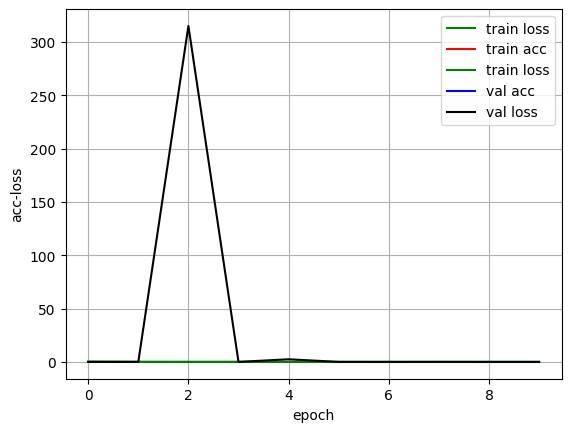

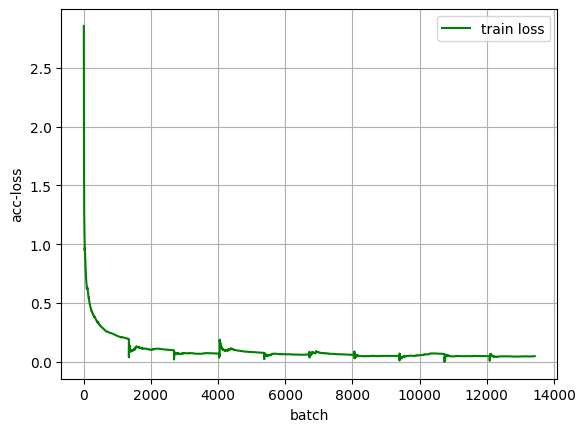

In [39]:
inceptionresnet(num_class=15,epochs=10)	# 5-class classificaiton
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()



In [ ]:
# def vgg16( num_class,epochs=20,frozen=15,lr=0.001,patience=2, dropout_rate=0.5,verbose=0, savepath='./VGG16.h5',history=history_this,input_shape=INPUT_SIZE):
#     model_fine_tune = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
#     for layer in model_fine_tune.layers[:frozen]:	#the number of frozen layers for transfer learning, have tuned from 5-18
#         layer.trainable = False
#     for layer in model_fine_tune.layers[frozen:]:
#         layer.trainable = True
#     model = GlobalAveragePooling2D()(model_fine_tune.output)
#     model=Dense(units=256,activation='relu')(model)
#     model=Dropout(dropout_rate)(model)
#     model = Dense(num_class, activation='softmax')(model)
#     model = Model(model_fine_tune.input, model, name='vgg')
#     opt = keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
#     model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])	#set the loss function to be binary crossentropy
#     #train model
#     earlyStopping = kcallbacks.EarlyStopping(
#         monitor='val_accuracy', patience=patience, verbose=verbose, mode='auto')	#set early stop patience to save training time
#     saveBestModel = kcallbacks.ModelCheckpoint(
#         filepath=savepath,
#         monitor='val_accuracy',
#         verbose=verbose,
#         save_best_only=True,
#         mode='auto')
#     hist = model.fit_generator(
#         train_generator,
#         steps_per_epoch=len(train_generator),
#         epochs=epochs,
#         validation_data=validation_generator,
#         validation_steps=len(validation_generator),
#         #use_multiprocessing=True,
#         #workers=2,
#         callbacks=[earlyStopping, saveBestModel, history],
#         verbose = verbose
#     )
#     return hist


In [ ]:
# def prediction(vgg_model):
# #read images from validation folder
#     rootdir = './test_224/'
#     test_laels = []
#     test_images=[]
#     for subdir, dirs, files in os.walk(rootdir):
#         for file in files:
#             if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
#                 continue
#             test_laels.append(subdir.split('/')[-1])
#             test_images.append(os.path.join(subdir, file))

#     predict=[]
#     length=len(test_images)
#     label=validation_generator.class_indices
#     label={v: k for k, v in label.items()}
#     for i in range(length):
#         inputimg=test_images[i]
#         test_batch=[]
#         thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
#         #print(thisimg)
#         test_shape=(1,)+thisimg.shape
#         thisimg=thisimg.reshape(test_shape)
#         vgg_model_batch=vgg_model.predict(thisimg) #use master model to process the input image
#         #generate result by model 1
#         prob=vgg_model_batch[0,np.argmax(vgg_model_batch,axis=1)[0]]
#         res=label[np.argmax(vgg_model_batch,axis=1)[0]]
#         predict.append(res)
#     acc=accuracy_score(test_laels,predict)
#     return acc


In [ ]:
# #define the objective function to be optimized
# import time
# from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials
# import matplotlib.pyplot as plt
# import statistics

# def objective(params):

#     params = {
#         'frozen': int(params['frozen']),
#         'epochs': int(params['epochs']),
#         'patience': int(params['patience']),
#         'lr': abs(float(params['lr'])),
#         'dropout_rate': abs(float(params['dropout_rate'])),
#     }
#     frozen=params['frozen']
#     epochs=params['epochs']
#     patience=params['patience']
#     lr=params['lr']
#     dropout_rate=params['dropout_rate']

#     vgg16(num_class=5, frozen=frozen,epochs=epochs,patience=patience, lr=lr, dropout_rate=dropout_rate)

#     acc=prediction(vgg_model=load_model('./VGG16.h5'))

#     print('accuracy:%s'%acc)
#     return {'loss': -acc, 'status': STATUS_OK }

In [50]:
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout
from keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict
import time

In [41]:
#generate images from train set and validation set
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=32

test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')


Found 10743 images belonging to 15 classes.


In [42]:
#generate labels indicating disease (1) or normal (0)
label=validation_generator.class_indices
label={v: k for k, v in label.items()}


In [43]:
print(label)

{0: 'BENIGN', 1: 'Bot', 2: 'DDoS', 3: 'DoS GoldenEye', 4: 'DoS Hulk', 5: 'FTP-Patator', 6: 'Heartbleed', 7: 'Infiltration', 8: 'PortScan', 9: 'SSH-Patator', 10: 'Slowhttptest', 11: 'WT BF', 12: 'WT SI', 13: 'WT XSS', 14: 'slowloris'}


In [44]:
#read images from validation folder
rootdir = './test_224/'
test_laels = []
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        test_laels.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))

print(test_laels[0],test_images[0])


Heartbleed ./test_224/Heartbleed/image_4.png


In [ ]:
cnn_model=load_model('./model_cnn_final.h5')


In [59]:
 #load model 1: xception
xception_model=load_model('./xception.h5')


In [58]:
#load model 2: VGG16
vgg_model=load_model('./VGG16.h5')

In [45]:
#  #load model 2: VGG16
# vgg_model=load_model('./VGG16.h5')
 #load model 3: VGG19
vgg19_model=load_model('./VGG19.h5')
 #load model 4: inception
incep_model=load_model('./inception.h5')
 #load model 5: inceptionresnet
inres_model=load_model('./inceptionresnet.h5')


1/1 [==============================] - 8s 8s/step
Predicted result for the first image: Bot
Confidence level: 0.9534095


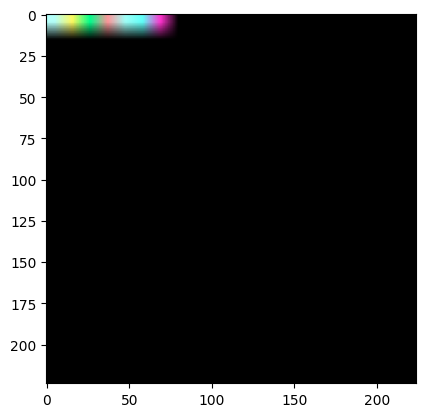

In [48]:
#Single image prediction
import cv2
import matplotlib.pyplot as plt
test=cv2.imread(test_images[0])

img_show=test[:,:,[2,1,0]]
test=test/255.
test_shape=(1,)+test.shape
test=test.reshape(test_shape)

res=inres_model.predict(test)

prob=res[0,np.argmax(res,axis=1)[0]]
res=label[np.argmax(res,axis=1)[0]]
print('Predicted result for the first image: %s'%res)
print('Confidence level: %s'%prob)
plt.imshow(img_show)
plt.show()


In [ ]:
pwd

'/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning'

In [ ]:
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    cnn_model_batch=cnn_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=cnn_model_batch[0,np.argmax(cnn_model_batch,axis=1)[0]]
    res=label[np.argmax(cnn_model_batch,axis=1)[0]]
    predict.append(res)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 35ms/step
CPU times: user 15min, sys: 26 s, total: 15min 26s
Wall time: 17min 46s


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('cnn accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1','2','3', '4','5','6', '7','8','9', '10','11','12', '13','14']
print(classification_report(test_laels, predict, target_names=target_names))



cnn accuracy: 0.9780322070185237
precision: 0.9685321960513953
recall: 0.9780322070185237
f1: 0.9723373681798468
[[ 980    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0  376    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0  942    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 1027    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1501    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0  793    0    0    0    0    0    1    0    0
     2]
 [   0    1    0    0    0    0    0    0    0    0    1    0    0    0
     0]
 [   0    5    0    0    0    0    0    9    0    0    0    0    0    0
     0]
 [   3    0    0    0    0    0    0    0 1164    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0 1196    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0 1036    1    0    0
    22]
 [   0 

In [60]:
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    xception_model_batch=xception_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=xception_model_batch[0,np.argmax(xception_model_batch,axis=1)[0]]
    res=label[np.argmax(xception_model_batch,axis=1)[0]]
    predict.append(res)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 22ms/step
CPU times: user 16min 1s, sys: 24.4 s, total: 16min 25s
Wall time: 18min 58s


In [61]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('xception accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1','2','3', '4','5','6', '7','8','9', '10','11','12', '13','14']
print(classification_report(test_laels, predict, target_names=target_names))



xception accuracy: 0.9803593037326631
precision: 0.9723391709252529
recall: 0.9803593037326631
f1: 0.9756476695428128
[[ 985    0    3    0    9    0    0    0    0    0    0    0    0    0
     0]
 [   0  390    0    0    0    0    0    0    0    1    0    1    0    0
     0]
 [   0    0  946    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 1012    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1577    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    2    0  754    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    3    0    0    0    0    0    0    0
     0]
 [   0    1    0    0    0    0    0    2    0    2    0    0    0    0
     0]
 [   0    0    1    0    2    0    0    0 1145    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0 1178    1    0    0    0
     1]
 [   0    0    0    0    0    0    0    0    0    3 1133    2    0    0
    18]
 [

In [62]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    vgg_model_batch=vgg_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=vgg_model_batch[0,np.argmax(vgg_model_batch,axis=1)[0]]
    res=label[np.argmax(vgg_model_batch,axis=1)[0]]
    predict.append(res)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 40ms/step
CPU times: user 16min 37s, sys: 26.5 s, total: 17min 3s
Wall time: 19min 11s


In [63]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('VGG16 accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1','2','3', '4','5','6', '7','8','9', '10','11','12', '13','14']
print(classification_report(test_laels, predict, target_names=target_names))

VGG16 accuracy: 0.9829656520524993
precision: 0.9752975834112966
recall: 0.9829656520524993
f1: 0.9782853071479792
[[ 997    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0  392    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0  946    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 1012    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1576    0    0    0    1    0    0    0    0    0
     0]
 [   0    0    0    0    0  754    0    0    0    1    0    1    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    3    0    0    0
     0]
 [   0    0    0    0    0    0    0    2    0    0    0    3    0    0
     0]
 [   0    0    0    0    0    0    0    0 1148    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0 1180    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0 1138    5    0    0
    13]
 [   

In [51]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    vgg19_model_batch=vgg19_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=vgg19_model_batch[0,np.argmax(vgg19_model_batch,axis=1)[0]]
    res=label[np.argmax(vgg19_model_batch,axis=1)[0]]
    predict.append(res)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 42ms/step
CPU times: user 15min 17s, sys: 23.5 s, total: 15min 40s
Wall time: 17min 45s


In [52]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('VGG19 accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1','2','3', '4','5','6', '7','8','9', '10','11','12', '13','14']
print(classification_report(test_laels, predict, target_names=target_names))

VGG19 accuracy: 0.9829656520524993
precision: 0.9861166630884518
recall: 0.9829656520524993
f1: 0.978680682646007
[[ 997    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0  391    0    0    0    0    0    0    0    0    0    1    0    0
     0]
 [   0    0  946    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 1012    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1577    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0  756    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    3    0    0    0    0    0    0    0
     0]
 [   0    1    0    0    0    0    0    2    0    0    1    1    0    0
     0]
 [   0    0    0    0    0    0    0    0 1148    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0 1179    0    0    0    0
     1]
 [   0    0    0    0    0    0    0    0    0    0 1148    1    0    0
     7]
 [   0

In [53]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    incep_model_batch=incep_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=incep_model_batch[0,np.argmax(incep_model_batch,axis=1)[0]]
    res=label[np.argmax(incep_model_batch,axis=1)[0]]
    predict.append(res)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 27ms/step
CPU times: user 17min 8s, sys: 24.3 s, total: 17min 32s
Wall time: 19min 44s


In [54]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('inception accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1','2','3', '4','5','6', '7','8','9', '10','11','12', '13','14']
print(classification_report(test_laels, predict, target_names=target_names))

inception accuracy: 0.9835241552638928
precision: 0.9754043310646981
recall: 0.9835241552638928
f1: 0.978773324757969
[[ 997    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0  390    0    0    0    0    0    2    0    0    0    0    0    0
     0]
 [   1    0  945    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 1011    0    1    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1577    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    1    0  755    0    0    0    0    0    0    0    0
     0]
 [   0    1    0    0    0    0    0    0    0    0    2    0    0    0
     0]
 [   0    1    0    0    0    0    0    3    0    0    1    0    0    0
     0]
 [   0    0    0    0    0    0    0    0 1148    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0 1180    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0 1131    1    0    0
    24]
 [

In [55]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    inres_model_batch=inres_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=inres_model_batch[0,np.argmax(inres_model_batch,axis=1)[0]]
    res=label[np.argmax(inres_model_batch,axis=1)[0]]
    predict.append(res)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 37ms/step
CPU times: user 21min 43s, sys: 25.1 s, total: 22min 8s
Wall time: 25min 23s


In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('inceptionresnet accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1','2','3', '4','5','6', '7','8','9', '10','11','12', '13','14']
print(classification_report(test_laels, predict, target_names=target_names))

inceptionresnet accuracy: 0.9844549939495485
precision: 0.987306931831224
recall: 0.9844549939495485
f1: 0.9801391835095655
[[ 997    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0  390    0    0    0    0    0    2    0    0    0    0    0    0
     0]
 [   1    0  945    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 1012    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1577    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0  756    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    3    0    0
     0]
 [   0    1    0    0    0    0    0    2    0    0    1    1    0    0
     0]
 [   0    0    1    0    0    0    0    0 1147    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0 1177    1    0    0    0
     2]
 [   0    0    0    0    0    0    0    0    0    0 1143    2    0    0
    

In [ ]:
 #load model 6: resnet
res_model=load_model('./resnet.h5')

In [ ]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    res_model_batch=res_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=res_model_batch[0,np.argmax(res_model_batch,axis=1)[0]]
    res=label[np.argmax(res_model_batch,axis=1)[0]]
    predict.append(res)

In [ ]:
%%time
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('resnet accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1','2','3', '4','5','6', '7','8','9', '10','11','12', '13','14']
print(classification_report(test_laels, predict, target_names=target_names))

In [64]:
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range((length//127)+1):
    inputimg=test_images[127*i:127*(i+1)]
    test_batch=[]
    for path in inputimg:
        thisimg=np.array(Image.open(path))/255
        test_batch.append(thisimg)
    #generate result by model 1
    xception_model_batch=xception_model.predict(np.array(test_batch))
    xception_model_batch=list(np.argmax(xception_model_batch,axis=1))
    xception_model_batch=[label[con] for con in xception_model_batch]
#     print(xception_model_batch)
    #generate result by model 2
    vgg_model_batch=vgg_model.predict(np.array(test_batch))
    vgg_model_batch=list(np.argmax(vgg_model_batch,axis=1))
    vgg_model_batch=[label[con] for con in vgg_model_batch]
#     print(vgg_model_batch)
    #generate result by model 3
    vgg19_model_batch=vgg19_model.predict(np.array(test_batch))
    vgg19_model_batch=list(np.argmax(vgg19_model_batch,axis=1))
    vgg19_model_batch=[label[con] for con in vgg19_model_batch]
#     print(vgg19_model_batch)
    #generate result by model 4
    incep_model_batch=incep_model.predict(np.array(test_batch))
    incep_model_batch=list(np.argmax(incep_model_batch,axis=1))
    incep_model_batch=[label[con] for con in incep_model_batch]
#     print(incep_model_batch)
    #generate result by model 5
    inres_model_batch=inres_model.predict(np.array(test_batch))
    inres_model_batch=list(np.argmax(inres_model_batch,axis=1))
    inres_model_batch=[label[con] for con in inres_model_batch]
#     print(inres_model_batch)
    #bagging the three results generated by 3 singular models
    predict_batch=[]
    for i,j,k,p,q in zip(xception_model_batch,vgg_model_batch,vgg19_model_batch,incep_model_batch,inres_model_batch):
        count=defaultdict(int)
        count[i]+=1
        count[j]+=1
        count[k]+=1
        count[p]+=1
        count[q]+=1
        #rank the predicted results in descending order
        predict_one=sorted(count.items(), key=operator.itemgetter(1),reverse=True)[0][0]
        predict_batch.append(predict_one)
#     print('predict:',predict_batch)
    predict.append(predict_batch)
t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

3/3 [==============================] - 2s 829ms/step
The testing time is :469.036093 seconds


In [65]:
predict=sum(predict,[])

In [66]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
print('bagging accuracy:%s'%acc)

bagging accuracy:0.9836172391324584


In [67]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1','2','3', '4','5','6', '7','8','9', '10','11','12', '13','14']
print(classification_report(test_laels, predict, target_names=target_names))

[[ 997    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0  391    0    0    0    0    0    0    0    0    0    1    0    0
     0]
 [   0    0  946    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 1012    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1577    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    1    0  755    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    3    0    0    0    0    0    0    0
     0]
 [   0    1    0    0    0    0    0    2    0    0    1    1    0    0
     0]
 [   0    0    0    0    0    0    0    0 1148    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0 1180    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0 1147    2    0    0
     7]
 [   0    0    0    0    0    0    0    0    0    0    0  300    0    0
     0]
 [   0    0    0    0    0    0    0    

In [68]:
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout,Average
from keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict
import tensorflow as tf

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [76]:
import time
t1 = time.time()
img=Input(shape=(224,224,3),name='img')
feature1=vgg19_model(img)
feature2=xception_model(img)
feature3=inres_model(img)
for layer in vgg19_model.layers:
    layer.trainable = False
for layer in xception_model.layers:
    layer.trainable = False
for layer in inres_model.layers:
    layer.trainable = False
output=Average()([feature1,feature2,feature3]) #add the confidence lists generated by 3 models
model=Model(inputs=img,outputs=output)

#the optimization function
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

The testing time is :4.367806 seconds


In [77]:
#read images from validation folder
rootdir = './test_224/'
test_laels = []
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        test_laels.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))

print(test_laels[0],test_images[0])

Heartbleed ./test_224/Heartbleed/image_4.png


In [78]:
#test the averaging model on the validation set
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range((length//127)+1):
    inputimg=test_images[127*i:127*(i+1)]
    test_batch=[]
    for path in inputimg:
        thisimg=np.array(Image.open(path))/255
        test_batch.append(thisimg)
    #print(i, np.array(test_batch).shape)
    model_batch=model.predict(np.array(test_batch))
    predict_batch=list(np.argmax(model_batch,axis=1))
    predict_batch=[label[con] for con in predict_batch]
    predict.append(predict_batch)

predict=sum(predict,[])

t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

3/3 [==============================] - 1s 335ms/step
The testing time is :224.173572 seconds


In [79]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(test_laels,predict)
print('Probability Averaging accuracy:%s'%acc)

Probability Averaging accuracy:0.9857581681094666


In [80]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1','2','3', '4','5','6', '7','8','9', '10','11','12', '13','14']
print(classification_report(test_laels, predict, target_names=target_names))

[[ 997    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0  391    0    0    0    0    0    0    0    0    0    1    0    0
     0]
 [   0    0  946    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 1012    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1577    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0  756    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    3    0    0    0    0    0    0    0
     0]
 [   0    1    0    0    0    0    0    2    0    0    1    1    0    0
     0]
 [   0    0    0    0    0    0    0    0 1148    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0 1178    0    0    0    0
     2]
 [   0    0    0    0    0    0    0    0    0    0 1150    2    0    0
     4]
 [   0    0    0    0    0    0    0    0    0    0    0  300    0    0
     0]
 [   0    0    0    0    0    0    0    

In [81]:
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout
from keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from keras.optimizers import SGD

In [82]:
for i,layer in enumerate(xception_model.layers):
    print(i,layer.name)

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_7
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_8
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_9
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv3_a

In [83]:
for i,layer in enumerate(vgg_model.layers):
    print(i,layer.name)

0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d_2
20 dense_4
21 dropout_2
22 dense_5


In [84]:
for i,layer in enumerate(vgg19_model.layers):
    print(i,layer.name)

0 vgg19_input_1
1 vgg19_block1_conv1
2 vgg19_block1_conv2
3 vgg19_block1_pool
4 vgg19_block2_conv1
5 vgg19_block2_conv2
6 vgg19_block2_pool
7 vgg19_block3_conv1
8 vgg19_block3_conv2
9 vgg19_block3_conv3
10 vgg19_block3_conv4
11 vgg19_block3_pool
12 vgg19_block4_conv1
13 vgg19_block4_conv2
14 vgg19_block4_conv3
15 vgg19_block4_conv4
16 vgg19_block4_pool
17 vgg19_block5_conv1
18 vgg19_block5_conv2
19 vgg19_block5_conv3
20 vgg19_block5_conv4
21 vgg19_block5_pool
22 vgg19_global_average_pooling2d
23 vgg19_dense
24 vgg19_dropout
25 vgg19_dense_1


In [85]:
for i,layer in enumerate(incep_model.layers):
    print(i,layer.name)

0 incep_input_1
1 incep_conv2d
2 incep_batch_normalization
3 incep_activation
4 incep_conv2d_1
5 incep_batch_normalization_1
6 incep_activation_1
7 incep_conv2d_2
8 incep_batch_normalization_2
9 incep_activation_2
10 incep_max_pooling2d
11 incep_conv2d_3
12 incep_batch_normalization_3
13 incep_activation_3
14 incep_conv2d_4
15 incep_batch_normalization_4
16 incep_activation_4
17 incep_max_pooling2d_1
18 incep_conv2d_8
19 incep_batch_normalization_8
20 incep_activation_8
21 incep_conv2d_6
22 incep_conv2d_9
23 incep_batch_normalization_6
24 incep_batch_normalization_9
25 incep_activation_6
26 incep_activation_9
27 incep_average_pooling2d
28 incep_conv2d_5
29 incep_conv2d_7
30 incep_conv2d_10
31 incep_conv2d_11
32 incep_batch_normalization_5
33 incep_batch_normalization_7
34 incep_batch_normalization_10
35 incep_batch_normalization_11
36 incep_activation_5
37 incep_activation_7
38 incep_activation_10
39 incep_activation_11
40 incep_mixed0
41 incep_conv2d_15
42 incep_batch_normalization_15

In [86]:
for i,layer in enumerate(inres_model.layers):
    print(i,layer.name)

0 inres_input_1
1 inres_conv2d
2 inres_batch_normalization
3 inres_activation
4 inres_conv2d_1
5 inres_batch_normalization_1
6 inres_activation_1
7 inres_conv2d_2
8 inres_batch_normalization_2
9 inres_activation_2
10 inres_max_pooling2d
11 inres_conv2d_3
12 inres_batch_normalization_3
13 inres_activation_3
14 inres_conv2d_4
15 inres_batch_normalization_4
16 inres_activation_4
17 inres_max_pooling2d_1
18 inres_conv2d_8
19 inres_batch_normalization_8
20 inres_activation_8
21 inres_conv2d_6
22 inres_conv2d_9
23 inres_batch_normalization_6
24 inres_batch_normalization_9
25 inres_activation_6
26 inres_activation_9
27 inres_average_pooling2d
28 inres_conv2d_5
29 inres_conv2d_7
30 inres_conv2d_10
31 inres_conv2d_11
32 inres_batch_normalization_5
33 inres_batch_normalization_7
34 inres_batch_normalization_10
35 inres_batch_normalization_11
36 inres_activation_5
37 inres_activation_7
38 inres_activation_10
39 inres_activation_11
40 inres_mixed_5b
41 inres_conv2d_15
42 inres_batch_normalization_

In [87]:
inres_model.summary()


Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inres_input_1 (InputLayer)  [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 inres_conv2d (Conv2D)       (None, 111, 111, 32)         864       ['inres_input_1[0][0]']       
                                                                                                  
 inres_batch_normalization   (None, 111, 111, 32)         96        ['inres_conv2d[0][0]']        
 (BatchNormalization)                                                                             
                                                                                                  
 inres_activation (Activati  (None, 111, 111, 32)         0         ['inres_batch_normalizati

In [88]:
model1=Model(inputs=[xception_model.layers[0].get_input_at(0)],outputs=xception_model.get_layer('dense_3').output,name='xception')
model2=Model(inputs=[vgg_model.layers[0].get_input_at(0)],outputs=vgg_model.get_layer('dense_5').output,name='vgg')
model3=Model(inputs=[vgg19_model.layers[0].get_input_at(0)],outputs=vgg19_model.get_layer('vgg19_dense_1').output,name='vgg19')
model4=Model(inputs=[incep_model.layers[0].get_input_at(0)],outputs=incep_model.get_layer('incep_dense_1').output,name='incep')
model5=Model(inputs=[inres_model.layers[0].get_input_at(0)],outputs=inres_model.get_layer('inres_dense_1').output,name='inres')

In [89]:
#plot the figures
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [90]:
ensemble_history= LossHistory()

In [91]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=32	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 42976 images belonging to 15 classes.
Found 10743 images belonging to 15 classes.


In [92]:
def lr_decay(epoch):
    lrs = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0001,0.00001,0.000001,
           0.000001,0.000001,0.000001,0.000001,0.0000001,0.0000001,0.0000001,0.0000001,0.0000001,0.0000001
          ]
    return lrs[epoch]

In [93]:
auto_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=0, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)
my_lr = LearningRateScheduler(lr_decay)

In [94]:
def ensemble(num_class,epochs,savepath='./ensemble.h5'):
    img=Input(shape=(224,224,3),name='img')
    feature1=model3(img)
    feature2=model4(img)
    feature3=model5(img)
    x=concatenate([feature1,feature2,feature3])
    x=Dropout(0.5)(x)
    x=Dense(64,activation='relu')(x)
    x=Dropout(0.25)(x)
    output=Dense(num_class,activation='softmax',name='output')(x)
    model=Model(inputs=img,outputs=output)
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_accuracy',patience=2, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,saveBestModel,ensemble_history,auto_lr],
    )

In [95]:
ensemble_model=ensemble(num_class=15,epochs=20)

Epoch 1/20
1343/1343 [==============================] - ETA: 0s - loss: 0.5628 - accuracy: 0.8457
Epoch 1: val_accuracy improved from -inf to 0.98660, saving model to ./ensemble.h5
1343/1343 [==============================] - 657s 476ms/step - loss: 0.5628 - accuracy: 0.8457 - val_loss: 0.0396 - val_accuracy: 0.9866 - lr: 0.0010
Epoch 2/20
1343/1343 [==============================] - ETA: 0s - loss: 0.3494 - accuracy: 0.8723
Epoch 2: val_accuracy did not improve from 0.98660
1343/1343 [==============================] - 633s 471ms/step - loss: 0.3494 - accuracy: 0.8723 - val_loss: 0.0414 - val_accuracy: 0.9854 - lr: 0.0010
Epoch 3/20
1343/1343 [==============================] - ETA: 0s - loss: 0.3369 - accuracy: 0.8762
Epoch 3: val_accuracy did not improve from 0.98660
1343/1343 [==============================] - 626s 466ms/step - loss: 0.3369 - accuracy: 0.8762 - val_loss: 0.0389 - val_accuracy: 0.9866 - lr: 1.0000e-04
Epoch 3: early stopping


In [96]:
ensemble_model=load_model('./ensemble.h5')

In [97]:
#read images from validation folder
rootdir = './test_224/'
test_laels = []
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        test_laels.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))

print(test_laels[0],test_images[0])

Heartbleed ./test_224/Heartbleed/image_4.png


In [98]:
#test the averaging model on the validation set
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range((length//127)+1):
    inputimg=test_images[127*i:127*(i+1)]
    test_batch=[]
    for path in inputimg:
        thisimg=np.array(Image.open(path))/255
        test_batch.append(thisimg)
    #print(i, np.array(test_batch).shape)
    ensemble_model_batch=ensemble_model.predict(np.array(test_batch))
    predict_batch=list(np.argmax(ensemble_model_batch,axis=1))
    predict_batch=[label[con] for con in predict_batch]
    predict.append(predict_batch)

predict=sum(predict,[])

t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

3/3 [==============================] - 1s 284ms/step
The testing time is :217.343017 seconds


In [99]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
print('Concatenation accuracy:%s'%acc)

Concatenation accuracy:0.9865959229265568


In [100]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1','2','3', '4','5','6', '7','8','9', '10','11','12', '13','14']
print(classification_report(test_laels, predict, target_names=target_names))

[[ 997    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0  391    0    0    0    0    0    0    0    0    0    1    0    0
     0]
 [   1    0  945    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 1012    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1577    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0  756    0    0    0    0    0    0    0    0
     0]
 [   0    1    0    0    0    0    0    0    0    0    2    0    0    0
     0]
 [   0    3    0    0    0    0    0    0    0    0    1    1    0    0
     0]
 [   0    0    0    0    0    0    0    0 1148    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0 1179    0    0    0    0
     1]
 [   0    0    0    0    0    0    0    0    0    0 1148    1    0    0
     7]
 [   0    0    0    0    0    0    0    0    0    0    0  300    0    0
     0]
 [   0    0    0    0    0    0    0    

In [ ]:
!pip install -U tensorflow-model-optimization



In [ ]:
import tensorflow_model_optimization as tfmot
from tensorflow_model_optimization.quantization.keras import quantize_model


In [ ]:
###quantisation
import tensorflow as tf
from tensorflow.keras.models import load_model
# from tensorflow.model_optimization.quantization.keras import quantize_model

In [ ]:


# Load models
cnn_model = load_model('/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning/model_own.h5')
xception_model = load_model('/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning/xception.h5')
vgg16_model=load_model('/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning/VGG16.h5')
vgg19_model=load_model('/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning/VGG19.h5')
inception_model=load_model('/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning/inception.h5')
resnet_model=load_model('/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning/resnet.h5')
inceptionresnet_model=load_model('/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning/inceptionresnet.h5')



In [ ]:
# Quantize models
quantized_cnn_model = quantize_model(cnn_model)
quantized_xception_model = quantize_model(xception_model)
quantized_vgg16_model = quantize_model(vgg16_model)
quantized_vgg19_model = quantize_model(vgg19_model)
quantized_inception_model = quantize_model(inception_model)
quantized_resnet_model = quantize_model(resnet_model)
# quantized_inceptionresnet_model = quantize_model(inceptionresnet_model)


In [ ]:
# Compile quantized models
quantized_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
quantized_xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
quantized_vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
quantized_vgg19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
quantized_inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
quantized_resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# quantized_inceptionresnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Ensembling quantised models
def ensemble_predictions(models, data):
    # Make predictions with each model and store them
    predictions = [model.predict(data) for model in models]

    # Average the predictions
    avg_prediction = tf.reduce_mean(tf.stack(predictions, axis=0), axis=0)
    return avg_prediction


In [ ]:
BATCH_SIZE = 32

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning/test_224',
    target_size=INPUT_SIZE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


In [ ]:
# Evaluate the quantized model using the validation_generator
val_loss, val_accuracy = quantized_cnn_model.evaluate_generator(validation_generator, steps=len(validation_generator))
print(f"Quantized CNN Model Accuracy: {val_accuracy}")

val_loss, val_accuracy = quantized_xception_model.evaluate_generator(validation_generator, steps=len(validation_generator))
print(f"Quantized Xception Model Accuracy: {val_accuracy}")


In [ ]:
val_loss, val_accuracy = quantized_vgg16_model.evaluate_generator(validation_generator, steps=len(validation_generator))
print(f"Quantized VGG16 Model Accuracy: {val_accuracy}")

val_loss, val_accuracy = quantized_inception_model.evaluate_generator(validation_generator, steps=len(validation_generator))
print(f"Quantized Inception Model Accuracy: {val_accuracy}")

In [ ]:
val_loss, val_accuracy = quantized_vgg19_model.evaluate_generator(validation_generator, steps=len(validation_generator))
print(f"Quantized VGG19 Model Accuracy: {val_accuracy}")

val_loss, val_accuracy = quantized_resnet_model.evaluate_generator(validation_generator, steps=len(validation_generator))
print(f"Quantized Resnet Model Accuracy: {val_accuracy}")

In [ ]:
import numpy as np

def ensemble_predictions(models, generator):
    # Initialize accumulators
    avg_predictions = []
    actual_labels = []

    # Iterate over the generator
    for inputs, labels in generator:
        # Make predictions with each model and store them
        predictions = [model.predict(inputs) for model in models]

        # Average the predictions
        avg_predictions.extend(np.mean(predictions, axis=0))
        actual_labels.extend(labels)

    return np.array(avg_predictions), np.array(actual_labels)

# Get ensemble predictions and actual labels
ensemble_preds, actual_labels = ensemble_predictions([quantized_cnn_model, quantized_xception_model], validation_generator)

# Calculate accuracy
ensemble_accuracy = np.mean(np.argmax(ensemble_preds, axis=1) == np.argmax(actual_labels, axis=1))
print(f"Ensemble Accuracy: {ensemble_accuracy}")


In [101]:
import tensorflow as tf

# Load your pre-trained model
model = tf.keras.models.load_model('./ensemble.h5')  # Assuming your model file is in /content

# Convert the model to a quantized version
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
quantized_tflite_model = converter.convert()

# Save the quantized model in /content
with open('quantized_ensemble.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

In [102]:
import tensorflow as tf

# Load your pre-trained model
model = tf.keras.models.load_model('./inceptionresnet.h5')  # Assuming your model file is in /content

# Convert the model to a quantized version
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
quantized_tflite_model = converter.convert()

# Save the quantized model in /content
with open('quantized_inres.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

In [103]:
import tensorflow as tf

# Load your pre-trained model
model = tf.keras.models.load_model('./inception.h5')  # Assuming your model file is in /content

# Convert the model to a quantized version
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
quantized_tflite_model = converter.convert()

# Save the quantized model in /content
with open('quantized_incep.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

In [104]:
import tensorflow as tf

# Load your pre-trained model
model = tf.keras.models.load_model('./VGG16.h5')  # Assuming your model file is in /content

# Convert the model to a quantized version
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
quantized_tflite_model = converter.convert()

# Save the quantized model in /content
with open('quantized_vgg.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

In [105]:
import tensorflow as tf

# Load your pre-trained model
model = tf.keras.models.load_model('./VGG19.h5')  # Assuming your model file is in /content

# Convert the model to a quantized version
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
quantized_tflite_model = converter.convert()

# Save the quantized model in /content
with open('quantized_vgg19.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

In [106]:
import tensorflow as tf

# Load your pre-trained model
model = tf.keras.models.load_model('./xception.h5')  # Assuming your model file is in /content

# Convert the model to a quantized version
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
quantized_tflite_model = converter.convert()

# Save the quantized model in /content
with open('quantized_xception.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

In [109]:
import tensorflow as tf

# Load your pre-trained model
model = tf.keras.models.load_model('model_cnn_final.h5')  # Assuming your model file is in /content

# Convert the model to a quantized version
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
quantized_tflite_model = converter.convert()

# Save the quantized model in /content
with open('quantized_cnn.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

OSError: Unable to open file (truncated file: eof = 5242880, sblock->base_addr = 0, stored_eof = 21742136)

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='./quantized_vgg.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to preprocess a single input image
def preprocess_image(image_path):
    image = np.array(Image.open(image_path)) / 255
    return np.expand_dims(image, axis=0).astype(np.float32)

# Directory path for the test dataset
test_directory = './test_224'

# List to store ground truth labels and predictions
ground_truth_labels = []
predictions = []

# Iterate through each class subdirectory
for class_folder in os.listdir(test_directory):
    class_path = os.path.join(test_directory, class_folder)

    # Iterate through images in the class subdirectory
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)

        # Ground truth label (using class folder names as labels)
        ground_truth_label = class_folder
        ground_truth_labels.append(ground_truth_label)

        # Preprocess and make predictions
        test_input = preprocess_image(image_path)
        interpreter.set_tensor(input_details[0]['index'], test_input)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])
        prediction = np.argmax(output, axis=1)[0]
        predictions.append(class_folder)  # Use class folder name as the prediction

# Calculate accuracy
accuracy_tflite = accuracy_score(ground_truth_labels, predictions)
print('TFLite Model Accuracy: %.2f%%' % (accuracy_tflite * 100))

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(ground_truth_labels, predictions)
classification_rep = classification_report(ground_truth_labels, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='./quantized_ensemble.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to preprocess a single input image
def preprocess_image(image_path):
    image = np.array(Image.open(image_path)) / 255
    return np.expand_dims(image, axis=0).astype(np.float32)

# Directory path for the test dataset
test_directory = './test_224'

# List to store ground truth labels and predictions
ground_truth_labels = []
predictions = []

# Iterate through each class subdirectory
for class_folder in os.listdir(test_directory):
    class_path = os.path.join(test_directory, class_folder)

    # Iterate through images in the class subdirectory
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)

        # Ground truth label (using class folder names as labels)
        ground_truth_label = class_folder
        ground_truth_labels.append(ground_truth_label)

        # Preprocess and make predictions
        test_input = preprocess_image(image_path)
        interpreter.set_tensor(input_details[0]['index'], test_input)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])
        prediction = np.argmax(output, axis=1)[0]
        predictions.append(class_folder)  # Use class folder name as the prediction

# Calculate accuracy
accuracy_tflite = accuracy_score(ground_truth_labels, predictions)
print('TFLite Model Accuracy: %.2f%%' % (accuracy_tflite * 100))

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(ground_truth_labels, predictions)
classification_rep = classification_report(ground_truth_labels, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='./quantized_vgg19.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to preprocess a single input image
def preprocess_image(image_path):
    image = np.array(Image.open(image_path)) / 255
    return np.expand_dims(image, axis=0).astype(np.float32)

# Directory path for the test dataset
test_directory = './test_224'

# List to store ground truth labels and predictions
ground_truth_labels = []
predictions = []

# Iterate through each class subdirectory
for class_folder in os.listdir(test_directory):
    class_path = os.path.join(test_directory, class_folder)

    # Iterate through images in the class subdirectory
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)

        # Ground truth label (using class folder names as labels)
        ground_truth_label = class_folder
        ground_truth_labels.append(ground_truth_label)

        # Preprocess and make predictions
        test_input = preprocess_image(image_path)
        interpreter.set_tensor(input_details[0]['index'], test_input)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])
        prediction = np.argmax(output, axis=1)[0]
        predictions.append(class_folder)  # Use class folder name as the prediction

# Calculate accuracy
accuracy_tflite = accuracy_score(ground_truth_labels, predictions)
print('TFLite Model Accuracy: %.2f%%' % (accuracy_tflite * 100))

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(ground_truth_labels, predictions)
classification_rep = classification_report(ground_truth_labels, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='./quantized_incep.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to preprocess a single input image
def preprocess_image(image_path):
    image = np.array(Image.open(image_path)) / 255
    return np.expand_dims(image, axis=0).astype(np.float32)

# Directory path for the test dataset
test_directory = './test_224'

# List to store ground truth labels and predictions
ground_truth_labels = []
predictions = []

# Iterate through each class subdirectory
for class_folder in os.listdir(test_directory):
    class_path = os.path.join(test_directory, class_folder)

    # Iterate through images in the class subdirectory
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)

        # Ground truth label (using class folder names as labels)
        ground_truth_label = class_folder
        ground_truth_labels.append(ground_truth_label)

        # Preprocess and make predictions
        test_input = preprocess_image(image_path)
        interpreter.set_tensor(input_details[0]['index'], test_input)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])
        prediction = np.argmax(output, axis=1)[0]
        predictions.append(class_folder)  # Use class folder name as the prediction

# Calculate accuracy
accuracy_tflite = accuracy_score(ground_truth_labels, predictions)
print('TFLite Model Accuracy: %.2f%%' % (accuracy_tflite * 100))

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(ground_truth_labels, predictions)
classification_rep = classification_report(ground_truth_labels, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='./quantized_inres.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to preprocess a single input image
def preprocess_image(image_path):
    image = np.array(Image.open(image_path)) / 255
    return np.expand_dims(image, axis=0).astype(np.float32)

# Directory path for the test dataset
test_directory = './test_224'

# List to store ground truth labels and predictions
ground_truth_labels = []
predictions = []

# Iterate through each class subdirectory
for class_folder in os.listdir(test_directory):
    class_path = os.path.join(test_directory, class_folder)

    # Iterate through images in the class subdirectory
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)

        # Ground truth label (using class folder names as labels)
        ground_truth_label = class_folder
        ground_truth_labels.append(ground_truth_label)

        # Preprocess and make predictions
        test_input = preprocess_image(image_path)
        interpreter.set_tensor(input_details[0]['index'], test_input)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])
        prediction = np.argmax(output, axis=1)[0]
        predictions.append(class_folder)  # Use class folder name as the prediction

# Calculate accuracy
accuracy_tflite = accuracy_score(ground_truth_labels, predictions)
print('TFLite Model Accuracy: %.2f%%' % (accuracy_tflite * 100))

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(ground_truth_labels, predictions)
classification_rep = classification_report(ground_truth_labels, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='./quantized_xception.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to preprocess a single input image
def preprocess_image(image_path):
    image = np.array(Image.open(image_path)) / 255
    return np.expand_dims(image, axis=0).astype(np.float32)

# Directory path for the test dataset
test_directory = './test_224'

# List to store ground truth labels and predictions
ground_truth_labels = []
predictions = []

# Iterate through each class subdirectory
for class_folder in os.listdir(test_directory):
    class_path = os.path.join(test_directory, class_folder)

    # Iterate through images in the class subdirectory
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)

        # Ground truth label (using class folder names as labels)
        ground_truth_label = class_folder
        ground_truth_labels.append(ground_truth_label)

        # Preprocess and make predictions
        test_input = preprocess_image(image_path)
        interpreter.set_tensor(input_details[0]['index'], test_input)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])
        prediction = np.argmax(output, axis=1)[0]
        predictions.append(class_folder)  # Use class folder name as the prediction

# Calculate accuracy
accuracy_tflite = accuracy_score(ground_truth_labels, predictions)
print('TFLite Model Accuracy: %.2f%%' % (accuracy_tflite * 100))

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(ground_truth_labels, predictions)
classification_rep = classification_report(ground_truth_labels, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
